# Assignment 5

1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

### I will be using the 2020 ANES study; specifically, the cleaned dataset that I created in the 'Unleashing Open Data with Python' course last semester.  In order to minimize the amount of code in this jupyter notebook, I left all of the cleaning/recoding code in the previous jupyter notebook, exported the cleaned dataframe to a .csv, and will import the cleaned .csv below.

# 1.

In [77]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model, tree
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# read in dataset
ANES = pd.read_csv(r'C:\Users\17036\Desktop\mlnn-personal\Week-5\ANES_2020.csv', index_col=0)
ANES.head()

,race,social_class,income,president,sex,urban
0,Hispanic,Middle class,249999.0,0.0,Male,City
1,White,Middle class,109999.0,1.0,Female,Suburb
2,Asian,Middle class,39999.0,1.0,Male,Small town
3,Native American,Lower class,300000.0,0.0,Male,City
4,White,Working class,19999.0,1.0,Female,Suburb


In [24]:
# create dummy variables for categorical variables (for sklearn)
ANES_dummy = pd.get_dummies(ANES, drop_first=True)
ANES_dummy.head()

,income,president,race_Black,race_Hispanic,race_Multiple,race_Native American,race_White,social_class_Middle class,social_class_Upper class,social_class_Working class,sex_Male,urban_Rural area,urban_Small town,urban_Suburb
0,249999.0,0.0,0,1,0,0,0,1,0,0,1,0,0,0
1,109999.0,1.0,0,0,0,0,1,1,0,0,0,0,0,1
2,39999.0,1.0,0,0,0,0,0,1,0,0,1,0,1,0
3,300000.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0
4,19999.0,1.0,0,0,0,0,1,0,0,1,0,0,0,1


In [25]:
# predict income from race, sex, and urban
cols = ANES_dummy.filter(regex='race|sex|urban').columns
cols

Index(['race_Black', 'race_Hispanic', 'race_Multiple', 'race_Native American',
       'race_White', 'sex_Male', 'urban_Rural area', 'urban_Small town',
       'urban_Suburb'],
      dtype='object')

In [26]:
X = ANES_dummy[cols].values
y = ANES_dummy['income'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([-39914.0230184 , -20596.56901949, -20272.26188291, -29341.32454752,
         -4926.94044367,   9987.4420796 , -11338.38654354, -12017.49055758,
         20860.53576523]),
 100282.60111019813)

In [28]:
MSE_test = round(mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_), 0)
MSE_train = round(mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_), 0)

In [29]:
print('The MSE for the training set is: ' + str(MSE_train))
print('The MSE for the test set is: ' + str(MSE_test))
print('The MSE of the test set is ' + ('greater' if MSE_test>MSE_train else 'less') + ' than the MSE of the training set')

The MSE for the training set is: 5998669791.0
The MSE for the test set is: 5894460477.0
The MSE of the test set is less than the MSE of the training set


In [30]:
MAE_test = round(mean_absolute_error(y_test, np.dot(x_test, model.coef_) + model.intercept_), 0)
MAE_train = round(mean_absolute_error(y_train, np.dot(x_train, model.coef_) + model.intercept_), 0)

In [31]:
print('The MAE for the training set is: ' + str(MAE_train))
print('The MAE for the test set is: ' + str(MAE_test))
print('The MAE of the test set is ' + ('greater' if MAE_test>MAE_train else 'less') + ' than the MAE of the training set')

print('The MAE measures the average of the residuals.  To make sure the train and test MAE make sense',
     'I have plotted the histogram of all income values in the ANES dataset.')
print('The mean income is: ' + str(round(ANES.income.mean(), 0)),
     '\nThe standard deviation of income is: ' + str(round(ANES.income.std(), 0)))

The MAE for the training set is: 58736.0
The MAE for the test set is: 59162.0
The MAE of the test set is greater than the MAE of the training set
The MAE measures the average of the residuals.  To make sure the train and test MAE make sense I have plotted the histogram of all income values in the ANES dataset.
The mean income is: 96000.0 
The standard deviation of income is: 79700.0


<AxesSubplot:title={'center':'Histogram of Income provided by ANES'}, ylabel='Frequency'>

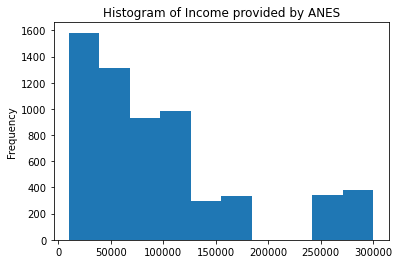

In [32]:
ANES.income.plot(kind='hist', title = 'Histogram of Income provided by ANES')

I decided to not plot this data along with the regression hyperplane due to it being highly dimensional.  In Week 3, we did learn how to show a graph of each x value along with the corresponding y value (and plotting the regression line).

# 2.

Predict Presidential Preference from income and sex

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.model_selection import train_test_split

In [33]:
ANES.president.value_counts()

1.0    3504
0.0    2667
Name: president, dtype: int64

A 1 in presidential preference indicates a preference of the Democratic candidate (Joe Biden) and a 0 indicates a preference of the Republican candidate (Donald Trump).

In [58]:
data = pd.get_dummies(ANES, columns=(list(ANES.columns).remove('president')), drop_first=True)
data.president = data.president.astype('int')
print(data.shape)

(6171, 14)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['president'], axis=1),data.president, test_size=.25)

In [61]:
model = DecisionTreeClassifier(criterion='entropy')

In [62]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
print('Each model feature and it\'s importance in the decision tree:')
list(zip(data.drop(['president'], axis=1).columns, model.feature_importances_))

Each model feature and it's importance in the decision tree:


[('income', 0.42007035260061515),
 ('race_Black', 0.1482924852091142),
 ('race_Hispanic', 0.04043462560210675),
 ('race_Multiple', 0.018479400843477208),
 ('race_Native American', 0.020952034340277235),
 ('race_White', 0.04784628772468929),
 ('social_class_Middle class', 0.03857766507182453),
 ('social_class_Upper class', 0.02503026286588851),
 ('social_class_Working class', 0.047218544473282734),
 ('sex_Male', 0.06841940075448011),
 ('urban_Rural area', 0.052834299890753375),
 ('urban_Small town', 0.05160647255694516),
 ('urban_Suburb', 0.020238168066545846)]

In [82]:
test_predictions = model.predict(x_test)

In [111]:
model1_accuracy = accuracy_score(y_test, test_predictions)
model1_accuracy

0.6208684381075826

In [67]:
confusion_matrix(y_test, test_predictions)

array([[374, 297],
       [288, 584]], dtype=int64)

In [68]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       671
           1       0.66      0.67      0.67       872

    accuracy                           0.62      1543
   macro avg       0.61      0.61      0.61      1543
weighted avg       0.62      0.62      0.62      1543



Check the delta in the model's accuarcy, precision, and recall on the train vs test datasets

In [71]:
train_predictions = model.predict(x_train)

In [73]:
accuracy_score(y_train, train_predictions)

0.7331460674157303

In [72]:
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1996
           1       0.77      0.75      0.76      2632

    accuracy                           0.73      4628
   macro avg       0.73      0.73      0.73      4628
weighted avg       0.73      0.73      0.73      4628



# 3.

After checking a few levels for max_depth, a decision tree with a max of 4 levels appears to have the largest accuracy with the test dataset.

In [126]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [127]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [128]:
test_predictions2 = model2.predict(x_test)

In [132]:
model2_accuracy = accuracy_score(y_test, test_predictions2)
print('By reducing the tree depth to a max depth of 4, the model accuracy improved:\n' +
     'Model 1 Accuracy: ' + str(model1_accuracy) +'\n' +
     'Model 2 Accuracy: ' + str(model2_accuracy) +'\n' +
     'Delta: ' + str(model2_accuracy - model1_accuracy))

By reducing the tree depth to a max depth of 4, the model accuracy improved:
Model 1 Accuracy: 0.6208684381075826
Model 2 Accuracy: 0.6506804925469863
Delta: 0.029812054439403712


In [130]:
print(tree.export_text(model))

|--- feature_1 <= 0.50
|   |--- feature_10 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 32499.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 17499.00
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_0 >  17499.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- tru

In [131]:
print(tree.export_text(model2))

|--- feature_1 <= 0.50
|   |--- feature_10 <= 0.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_11 >  0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_10 >  0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|--- feature_1 >  0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_10 >  0.50
|   |   |   |--- feature_0 <= 6